## Seaborn Introduction

### Reading a csv file  
Before you analyze data, you will need to read the data into a __pandas__ DataFrame. 
In this exercise, you will be looking at data from US School Improvement Grants in 2010. This program gave nearly $4B to schools to help them renovate or improve their programs.

This first step in most data analysis is to import pandas and seaborn and read a data file in order to analyze it further.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('schoolimprovement2010grants.csv')


### Comparing a histogram and distplot  
The `pandas` library supports simple plotting of data, which is very convenient when data is already likely to be in a `pandas` DataFrame.  
Seaborn generally does more statistical analysis on data and can provide more sophisticated insight into the data. 

In this exercise, we will compare a `pandas` histogram vs the `seaborn` distplot.

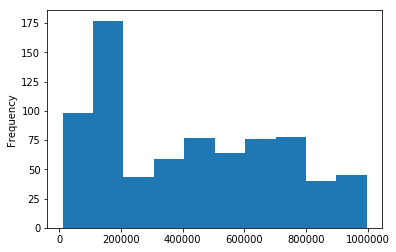

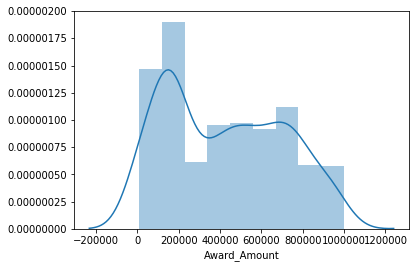

In [12]:
# Display pandas histogram
df['Award_Amount'].plot.hist()
plt.show()

# Display a Seaborn distplot
sns.distplot(df['Award_Amount'])
plt.show()

# Clear the distplot
# plt.clf()

### Plot a histogram  
The distplot() function will return a Kernel Density Estimate (KDE) by default. The KDE helps to smooth the distribution and is a useful way to look at the data. However, Seaborn can also support the more standard histogram approach if that is more meaningful for your analysis.

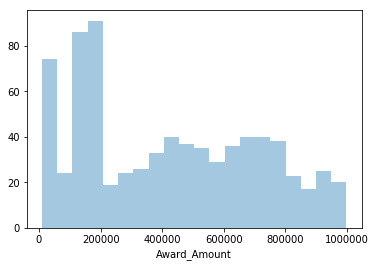

In [13]:
# Create a distplot
sns.distplot(df['Award_Amount'],
             kde=False,
             bins=20)

# Display the plot
plt.show()

### Rug plot and kde shading  
Now that you understand some function arguments for `distplot()`, we can continue further refining the output. This process of creating a visualization and updating it in an incremental fashion is a useful and common approach to look at data from multiple perspectives.

Seaborn excels at making this process simple.

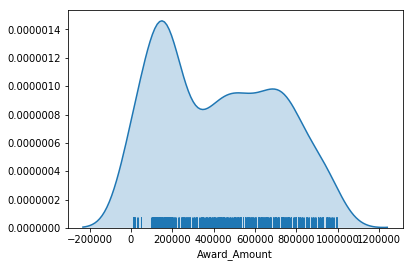

In [14]:
# Create a distplot of the Award Amount
sns.distplot(df['Award_Amount'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

# Plot the results
plt.show()

### Create a regression plot  
For this set of exercises, we will be looking at FiveThirtyEight's data on which US State has the worst drivers. The data set includes summary level information about fatal accidents as well as insurance premiums for each state as of 2010.  

In this exercise, we will look at the difference between the regression plotting functions.

In [21]:
columns = ['State', 'fatal_collisions', 'fatal_collisions_speeding','fatal_collisions_alc', 'fatal_collisions_not_distracted','fatal_collisions_no_hist', 
           'premiums', 'insurance_losses']
df = pd.read_csv('bad_drivers_fivethirtyeight.csv')
# df.columns
df.columns = columns

regions = ['South','West','West','West','South','West','Northeast','South','South','South','South','West','West','Midwest','Midwest','Midwest','Midwest','South','South','Northeast','South','Northeast','Midwest','Midwest','South','West','Midwest','Midwest','West','Northeast','Northeast','West','Northeast','South','Midwest','Midwest','South','West','Northeast','Northeast','South','Midwest','South','South','West','Northeast','South','West','South','West','Midwest']
df.loc[:,'Region'] = pd.Series(regions, index=df.index)

#display(df)

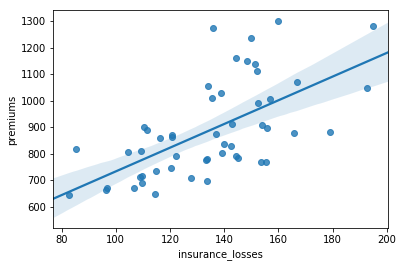

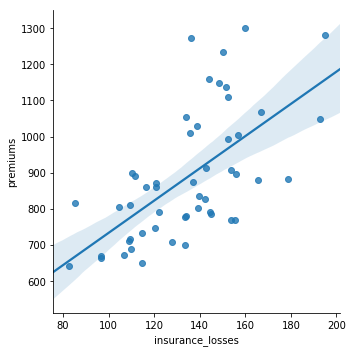

In [16]:
sns.regplot(data=df,
         x="insurance_losses",
         y="premiums")

# Display the plot
plt.show()

sns.lmplot(data=df,
         x="insurance_losses",
         y="premiums")

# Display the plot
plt.show()

### Plotting multiple variables
Since we are using `lmplot()` now, we can look at the more complex interactions of data. This data set includes geographic information by state and area. It might be interesting to see if there is a difference in relationships based on the `Region` of the country.


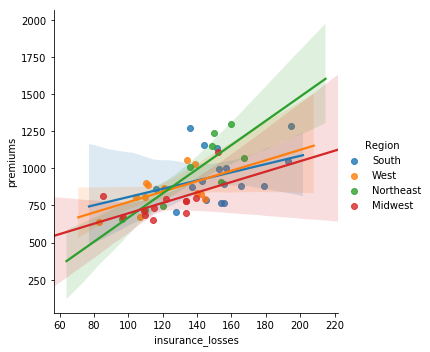

In [18]:
# Create a regression plot using hue
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           hue="Region")

# Show the results
plt.show()

### Facetting multiple regressions  
`lmplot()` allows us to facet the data across multiple rows and columns. In the previous plot, the multiple lines were difficult to read in one plot. We can try creating multiple plots by `Region` to see if that is a more useful visualization.

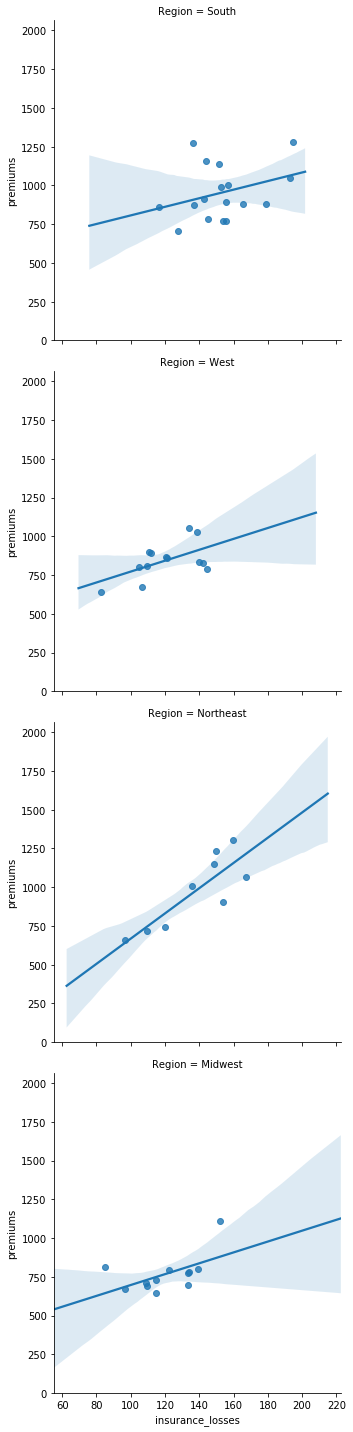

In [20]:
# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           row="Region")

# Show the plot
plt.show()